In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## CREAZIONE DATASET

In [2]:
x1 = np.random.normal(2,3, size = 10**3) # funzione gaussiana con valori casuali, param:2 = centro, 3 = deviazione standard, 10**3 (1000) = valori prodotti
x2 = np.random.normal(100,3, size = 10**3)
x3 = np.random.normal(0,10, size = 10**3)
x4 = np.random.normal(1,7, size = 10**3)
x5 = np.random.normal(15,30, size = 10**3)

In [ ]:
array = np.empty([1000,5]) #1000 dati divisi in 5 colonne

array[:,0] = x1
array[:,1] = x2
array[:,2] = x3
array[:,3] = x4
array[:,4] = x5


df = pd.DataFrame(array)
df.columns = ['var 1', 'var 2', 'var 3', 'var 4', 'var 5'] #nomi colonne
df


## CREAZIONE FUNZIONE TARGET

In [33]:
def funzione(a,b,c,d,e): 
    return 0.1*x1+3*x2+0.1*x3*2+0.5*x4*x5 #OCCHIO ALL'INTERAZIONE TRA X4 E X5, 0.5 INDICA LA CORRELAZIONE.

target=funzione(x1,x2,x3,x4,x5)

df['target'] = target #appendiamo colonne target
df

,var 1,var 2,var 3,var 4,var 5,target
0,-0.959086,99.627506,-9.337353,0.521597,-15.837611,296.836531
1,2.871981,98.281421,5.637886,-6.548560,15.423321,295.249031
2,2.067573,101.848750,16.520411,2.246008,13.713640,309.365099
3,4.783331,100.142135,9.536288,-3.583098,39.514092,301.396167
4,1.294281,98.127306,3.551825,3.145965,50.034456,296.795776
...,...,...,...,...,...,...
995,2.770983,101.984475,0.848294,-2.073711,-17.921238,306.771816
996,3.663386,101.486637,5.913934,-4.556145,9.186634,305.590482
997,3.039088,101.779954,3.717460,-16.845683,-22.269446,310.138702
998,-1.920087,98.598273,1.323331,3.297155,1.928961,295.931079


## REGRESSIONE LINEARE

Score :0.9462716474528059


<function matplotlib.pyplot.show(close=None, block=None)>

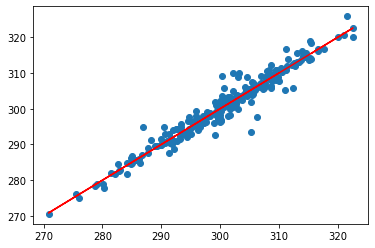

In [34]:
# target = a*var1 + b*var2 + c*var3 + d*var4 + e*var5  -- trovare i coefficenti (a,b,c,d,e) minimizzando la distanza con target

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:5] #tutte le righe della colonna 0-5
y = df.iloc [:,5] #tutte le righe della colonna 5

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25) #test = 25%

lreg = LinearRegression() #MODEL

lreg.fit(X_train, y_train) #TRAINING

y_pred = lreg.predict(X_test) #PREDICT



score = lreg.score(X_test, y_test) #SCORE
print('Score :' + str(score))

plt.scatter(y_pred, y_test)
plt.plot(y_pred,y_pred, 'r')
plt.show


Commento sui risultati ottenuti: score basso causato dalla funzione target che NON è una funzione lineare (X3 al quadrato e SOPRATTUTTO interazione tra X4 e X5)